<a href="https://colab.research.google.com/github/ArchitGupta16/Stock-Price-Forecasting/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [137]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA


In [138]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# loading the dataset

In [139]:
ds = pd.read_csv('/content/HCLTECH.csv')

In [140]:
ds.head(30)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.00,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.00,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.00,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.30,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.00,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN
5,2000-01-18,HCLTECH,EQ,1801.65,1730.55,1815.00,1657.55,1775.00,1774.50,1716.39,359900,6.177280e+13,NaN,NaN,NaN
6,2000-01-19,HCLTECH,EQ,1774.50,1815.00,1889.00,1760.00,1842.80,1851.15,1842.81,316050,5.824204e+13,NaN,NaN,NaN
7,2000-01-20,HCLTECH,EQ,1851.15,1865.00,1865.00,1750.00,1753.50,1757.85,1801.37,204700,3.687409e+13,NaN,NaN,NaN
8,2000-01-21,HCLTECH,EQ,1757.85,1761.00,1815.00,1705.00,1786.00,1781.35,1774.01,282150,5.005360e+13,NaN,NaN,NaN
9,2000-01-24,HCLTECH,EQ,1781.35,1834.90,1923.90,1795.00,1923.90,1923.90,1875.34,328650,6.163317e+13,NaN,NaN,NaN


# data preprocessing


### -> dropping missing values

In [141]:
hcl = ds.dropna()


In [142]:
hcl.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [143]:
hcl.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2844,2011-06-01,HCLTECH,EQ,514.80,511.40,516.00,509.00,514.75,514.40,512.70,287699,1.475043e+13,4845.0,146731.0,0.5100
2845,2011-06-02,HCLTECH,EQ,514.40,509.00,515.25,508.70,514.75,513.70,512.86,307689,1.578028e+13,6701.0,144265.0,0.4689
2846,2011-06-03,HCLTECH,EQ,513.70,512.05,517.50,508.90,513.70,512.35,513.58,379167,1.947326e+13,9447.0,143384.0,0.3782
2847,2011-06-06,HCLTECH,EQ,512.35,508.05,514.00,505.05,509.10,509.50,508.07,285294,1.449495e+13,5368.0,100251.0,0.3514
2848,2011-06-07,HCLTECH,EQ,509.50,504.05,514.95,504.05,511.95,511.80,510.77,403694,2.061968e+13,8530.0,262636.0,0.6506


### -> setting the date column as index of our dataset

In [144]:
hcl.index = pd.to_datetime(hcl.Date)


In [145]:
hcl.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2011-06-01,2011-06-01,HCLTECH,EQ,514.80,511.40,516.00,509.00,514.75,514.40,512.70,287699,1.475043e+13,4845.0,146731.0,0.5100
2011-06-02,2011-06-02,HCLTECH,EQ,514.40,509.00,515.25,508.70,514.75,513.70,512.86,307689,1.578028e+13,6701.0,144265.0,0.4689
2011-06-03,2011-06-03,HCLTECH,EQ,513.70,512.05,517.50,508.90,513.70,512.35,513.58,379167,1.947326e+13,9447.0,143384.0,0.3782
2011-06-06,2011-06-06,HCLTECH,EQ,512.35,508.05,514.00,505.05,509.10,509.50,508.07,285294,1.449495e+13,5368.0,100251.0,0.3514
2011-06-07,2011-06-07,HCLTECH,EQ,509.50,504.05,514.95,504.05,511.95,511.80,510.77,403694,2.061968e+13,8530.0,262636.0,0.6506


In [146]:
hcl.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

### -> selecting the column as our original time series data from the dataset

In [147]:
hcl = hcl["Prev Close"]['2000-01-12':'2021-04-29']

In [148]:
hcl.head()

Date
2011-06-01    514.80
2011-06-02    514.40
2011-06-03    513.70
2011-06-06    512.35
2011-06-07    509.50
Name: Prev Close, dtype: float64

In [149]:
hcl.describe()

count    2455.000000
mean      896.634684
std       320.421278
min       362.800000
25%       708.950000
50%       865.750000
75%      1023.725000
max      2065.700000
Name: Prev Close, dtype: float64

# data exploration

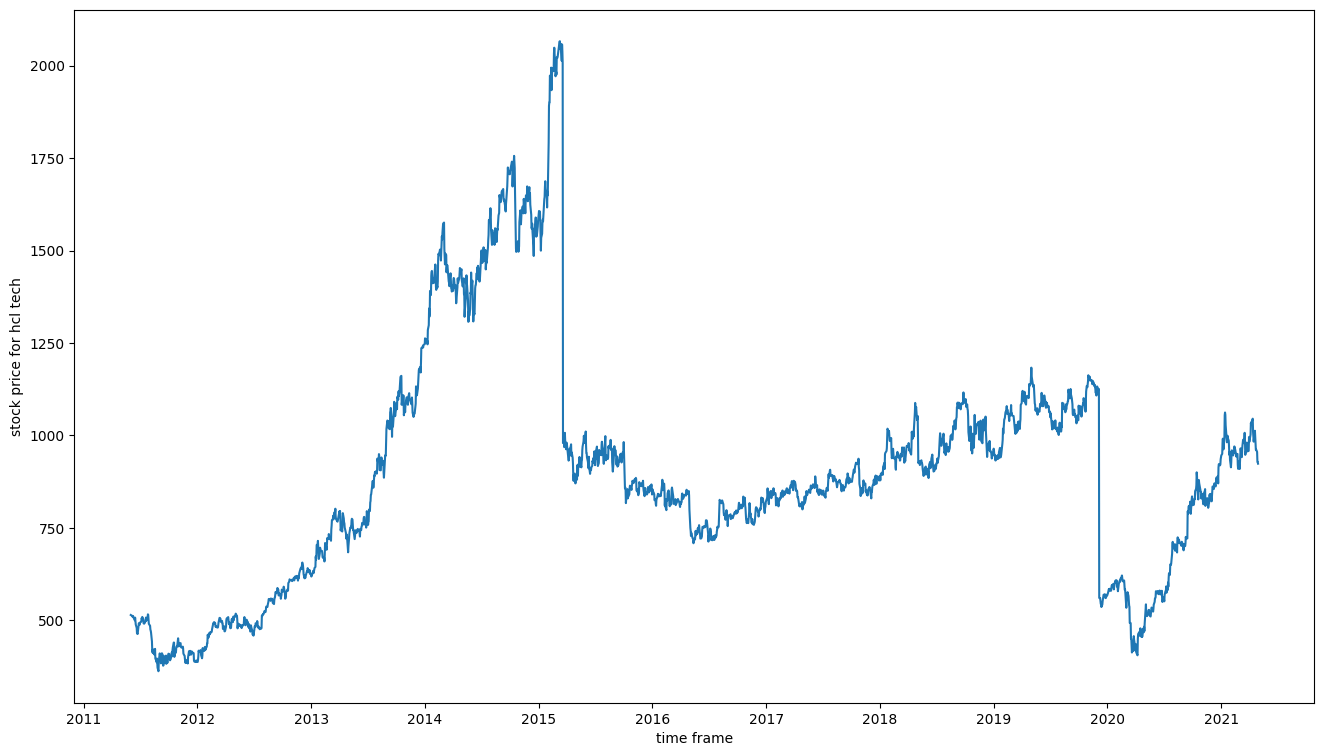

In [150]:
# Data Exploration

plt.figure(figsize=(16,9))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('time frame')
ax1.set_ylabel('stock price for hcl tech')
ax1.plot(hcl)

# checking stationarity

In [151]:
result = adfuller(hcl)
print("adf statistic  : ", result[0])
print("p value : ",result[1])
print("critical values : ",result[4])

adf statistic  :  -2.4058156761927725
p value :  0.14010170061473304
critical values :  {'1%': -3.4330175441935666, '5%': -2.862718497145558, '10%': -2.5673973613128673}


null hypothesis : not stationary , p value !< 0.05 so it means that its not stationary

# making data stationery

### -> applying the log transformations

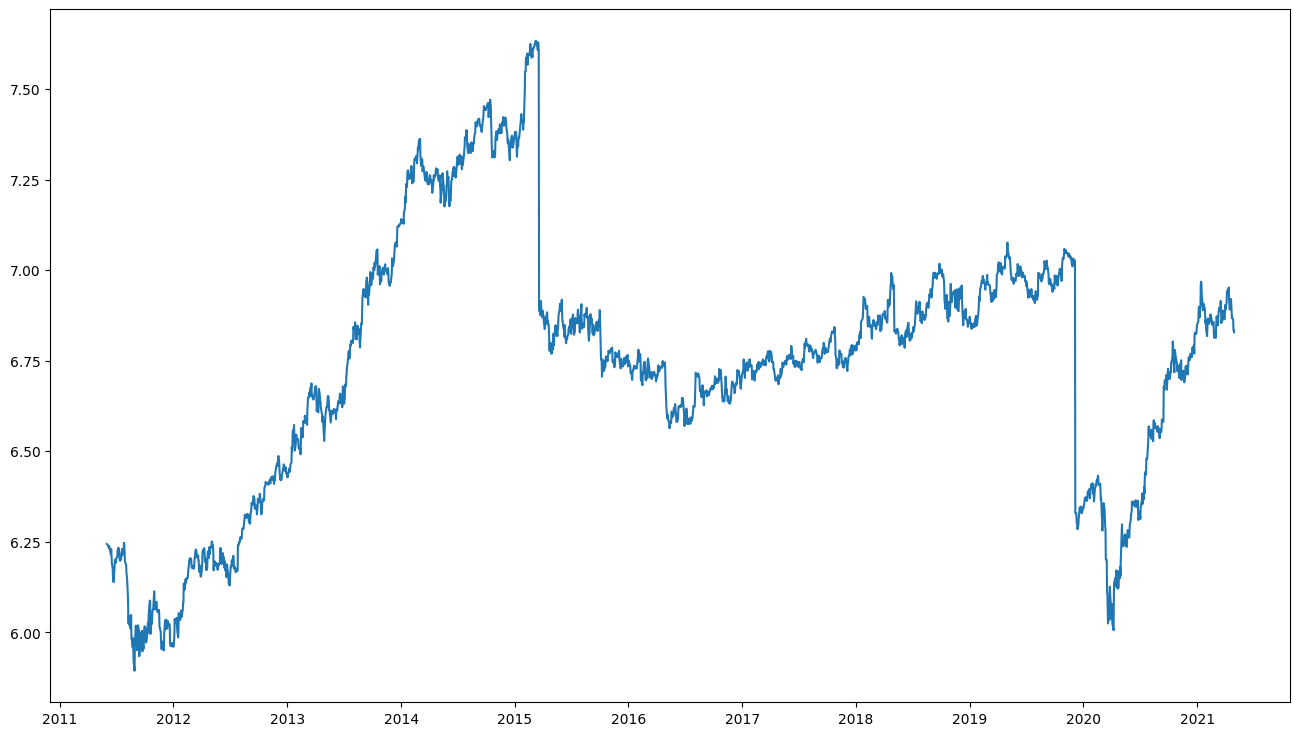

In [152]:
# transformation using log
plt.figure(figsize=(16,9))
fig=plt.figure(1)

ts_log = np.log(hcl)
plt.plot(ts_log)

### -> differencing the log values

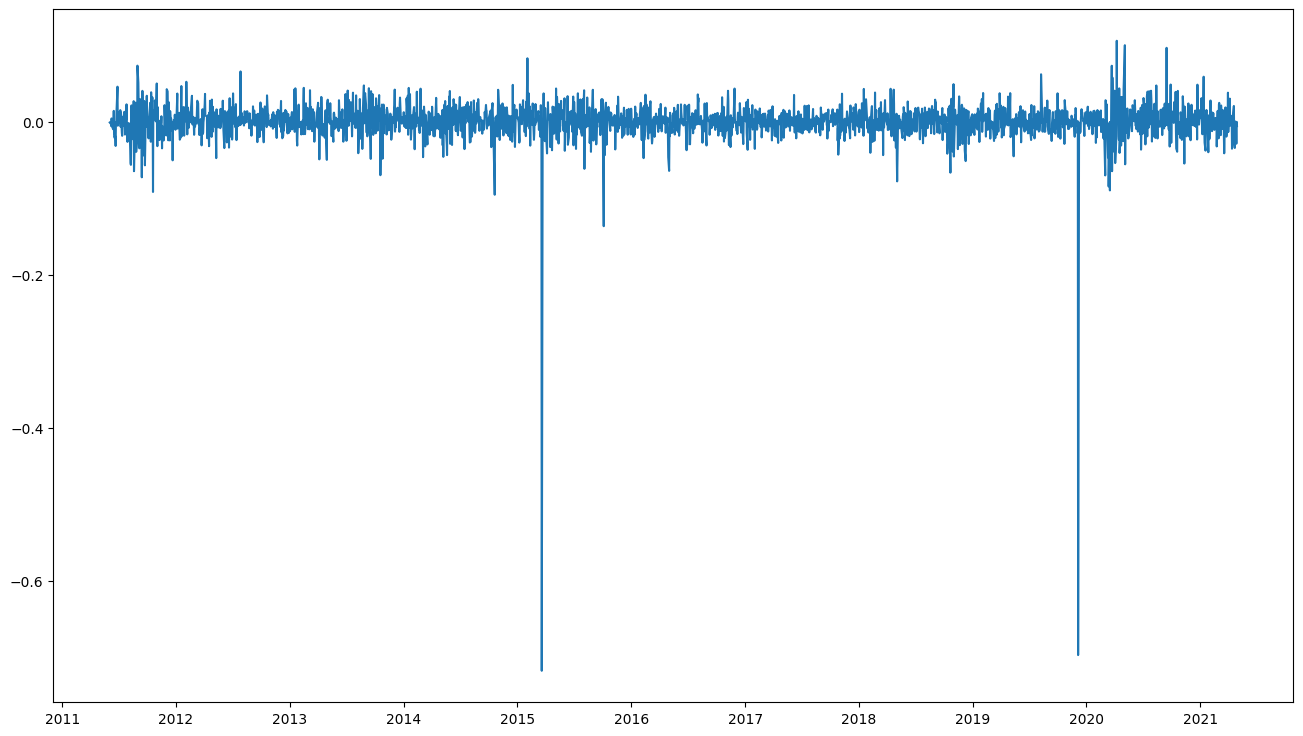

In [153]:
# differencing
plt.figure(figsize=(16,9))
fig = plt.figure(1)

ts_log_diff = ts_log-ts_log.shift()
plt.plot(ts_log_diff)

### -> confirming stationarity

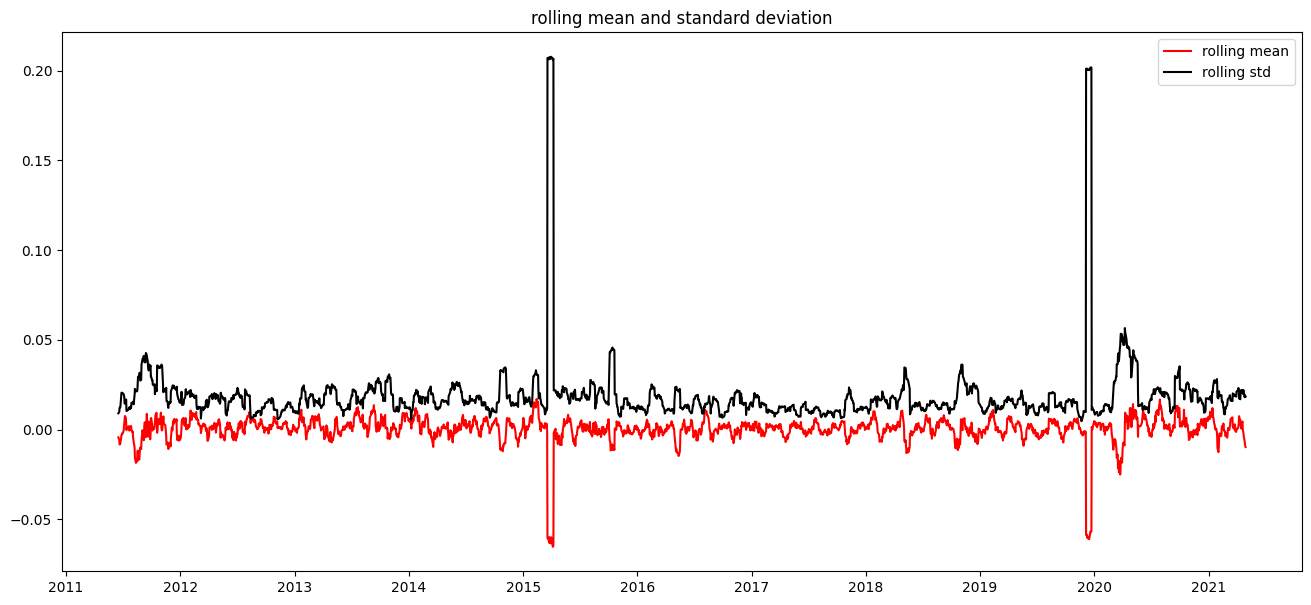

In [154]:
rollmean = ts_log_diff.rolling(12).mean()
rollstd = ts_log_diff.rolling(12).std()

plt.figure(figsize=(16,7))
mean = plt.plot(rollmean,label = 'rolling mean',color='red')
std = plt.plot(rollstd , label='rolling std',color='black')
plt.legend(loc='best')
plt.title('rolling mean and standard deviation')
plt.show(block=False)

# model creation

In [155]:
hcl.sort_index(inplace=True)

In [156]:
from statsmodels.tsa.stattools import acf,pacf
log_acf = acf(ts_log_diff,nlags=20)
log_pacf = pacf(ts_log_diff,nlags=20)

# selecting ar and ma terms

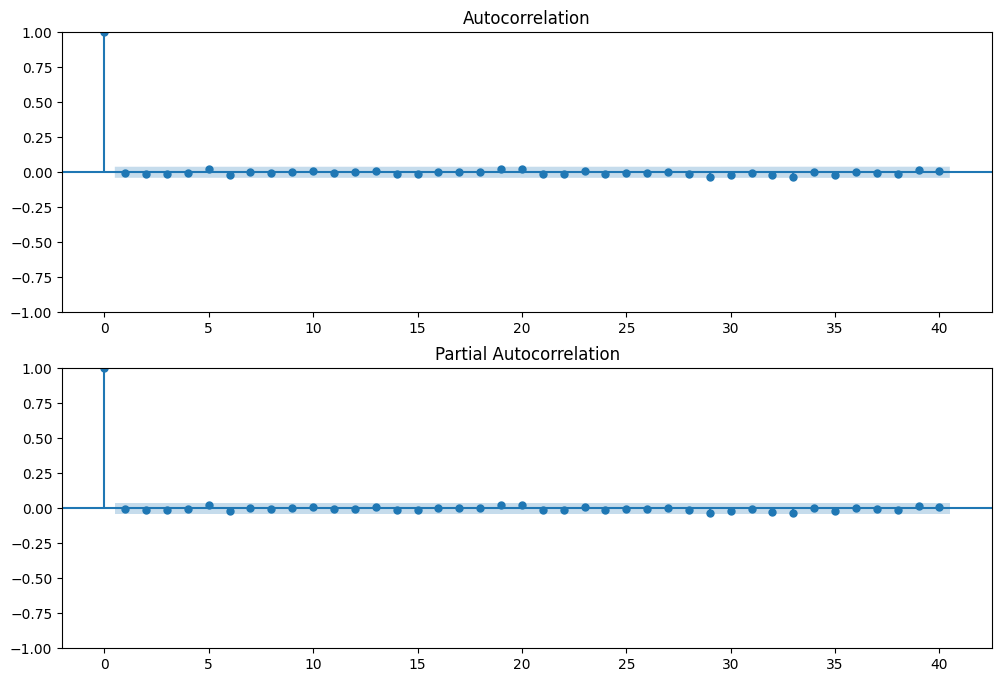

In [157]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)


so from the graph we can observe that the values will pe ar(p)=2, ma(q) = 2 ad we will take d=2 differences term by hit and trial

# fitting the model and prediction of values

In [158]:
from statsmodels.tsa.arima.model import ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


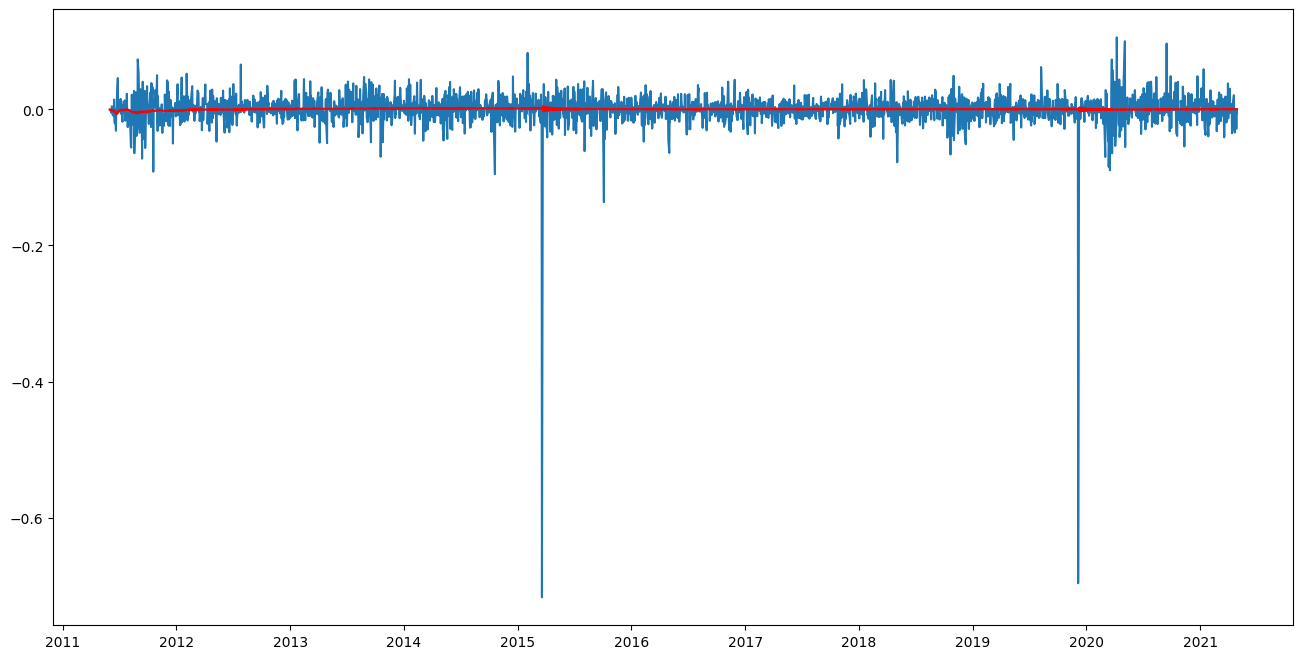

In [159]:
plt.figure(figsize=(16,8))
model = ARIMA(ts_log_diff,order=(2,1,2))
results_arima = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_arima.fittedvalues,color='red')

In [188]:
r = results_arima.predict(0,2200)

In [189]:
r

Date
2011-06-01    0.000000
2011-06-02    0.000000
2011-06-03   -0.000777
2011-06-06   -0.001362
2011-06-07   -0.002631
                ...   
2020-04-17    0.043764
2020-04-20   -0.040496
2020-04-21   -0.009836
2020-04-22    0.031886
2020-04-23   -0.030898
Name: predicted_mean, Length: 2201, dtype: float64

# model tuning

In [162]:
pip install pmdarima


In [163]:
import pmdarima as pm

In [164]:
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                             start_p=2,
                             start_q=2,
                              max_p=10,
                              max_q=10,
                              test='adf',
                              seasonal=True,
                              trace=True
                             )
    return automodel

In [165]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-10713.601, Time=2.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-10721.310, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10719.316, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-10719.317, Time=1.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-10723.121, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-10717.606, Time=2.57 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 7.784 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

### -> fitting using tuned model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


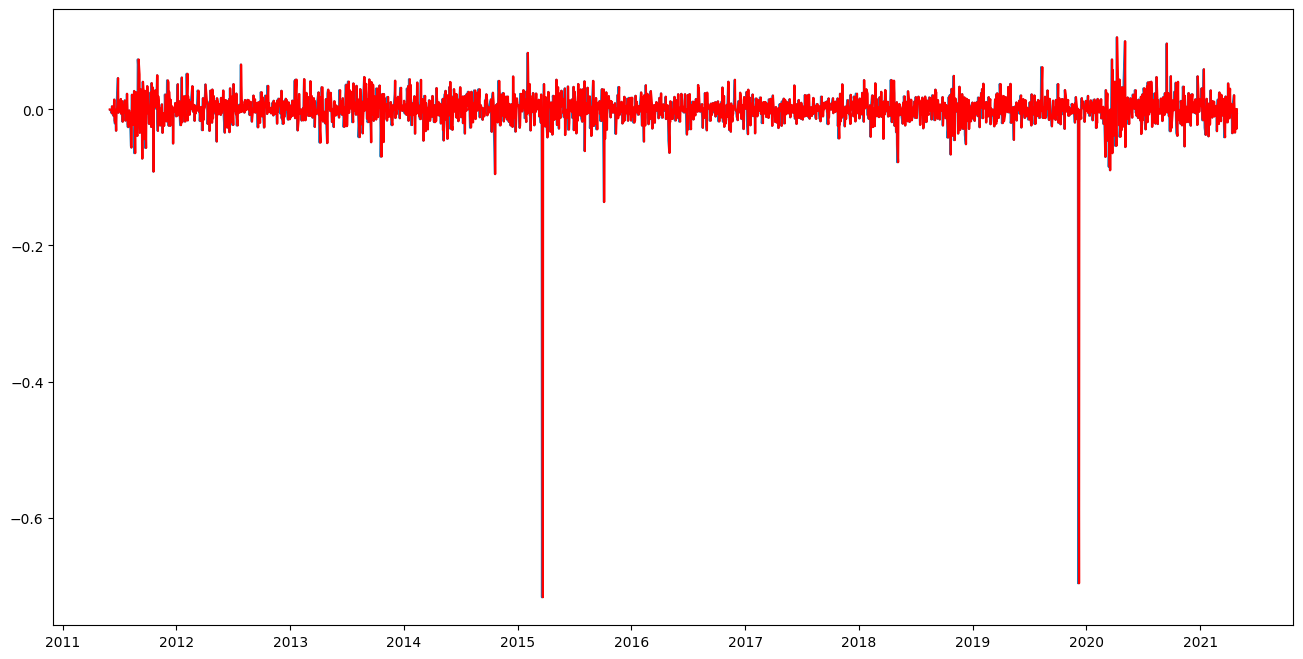

In [166]:
plt.figure(figsize=(16,8))
model2 = ARIMA(ts_log_diff,order=(0,1,0))
results_arima = model2.fit()
plt.plot(ts_log_diff)
plt.plot(results_arima.fittedvalues,color='red')

after tuning our model we got the values for (p,d,q) = (0,1,0)
